In [431]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data

In [432]:
data = pd.read_csv('PremiumList.csv',encoding='latin1')
#display first 10 dataset
data.head()

,MEMBER ID,NAME,DOB,AGE,BMI,GENDER,RELATION,NATIONALITY,MARITAL STATUS,EMIRATES ID,Is high risk profession,No. maternity claims,No. of critical illness claims,No. chronic illness claims,No. of other claims,Covid High cliam,RENEWAL PREMIUM
0,GW-GM-MID-3570,BAL SUDHA NISHAD,12/10/2000,21,23.124670,M,Employee,ISC,Single,NaN,no,0,0,0,0,0,2193.0
1,GW-GM-MID-3519,MOTI CHAND,02/05/1999,22,21.604105,M,Employee,ISC,Single,NaN,no,0,0,0,0,0,2193.0
2,GW-GM-MID-3542,ISLAM MIYA,10/02/2000,22,23.011177,M,Employee,ISC,Single,NaN,no,0,0,0,0,0,2193.0
3,GW-GM-MID-3562,BHERA SOLANKI,07/09/1999,22,21.829952,M,Employee,ISC,Single,NaN,no,0,0,0,0,0,2193.0
4,GW-GM-MID-4253,RANA,05/04/1999,22,23.555556,M,Employee,ISC,Single,NaN,no,0,0,0,0,0,2193.0


In [433]:
# shape of the dataset
data.shape

(5511, 17)

In [434]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 5511
Number of Columns 17


 Get Information About Dataset

In [435]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5511 entries, 0 to 5510
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MEMBER ID                        5511 non-null   object 
 1   NAME                             5480 non-null   object 
 2   DOB                              5511 non-null   object 
 3   AGE                              5511 non-null   int64  
 4   BMI                              5511 non-null   float64
 5   GENDER                           5511 non-null   object 
 6   RELATION                         5511 non-null   object 
 7   NATIONALITY                      5511 non-null   object 
 8   MARITAL STATUS                   5511 non-null   object 
 9   EMIRATES ID                      3394 non-null   object 
 10  Is high risk profession          5497 non-null   object 
 11  No. maternity claims             5511 non-null   int64  
 12  No. of  critical ill

In [436]:
# checking for the missing values in any column
data.isnull().sum()

MEMBER ID                             0
NAME                                 31
DOB                                   0
AGE                                   0
BMI                                   0
GENDER                                0
RELATION                              0
NATIONALITY                           0
MARITAL STATUS                        0
EMIRATES ID                        2117
Is high risk profession              14
No. maternity claims                  0
No. of  critical illness claims       0
No. chronic illness claims            0
No. of other claims                   0
Covid High cliam                      0
RENEWAL PREMIUM                       0
dtype: int64

In [437]:
# Drop reduntant features
# will drop NAME,EMIRATES ID and  MEMBER ID since these colums are not contributing to renewal premium 
# DOB and AGE are related so we can delete DOB colum also 
# Convert the dictionary into DataFrame 
df = pd.DataFrame(data)

df1=df.drop(columns =['NAME','EMIRATES ID','DOB','MEMBER ID '])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5511 entries, 0 to 5510
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AGE                              5511 non-null   int64  
 1   BMI                              5511 non-null   float64
 2   GENDER                           5511 non-null   object 
 3   RELATION                         5511 non-null   object 
 4   NATIONALITY                      5511 non-null   object 
 5   MARITAL STATUS                   5511 non-null   object 
 6   Is high risk profession          5497 non-null   object 
 7   No. maternity claims             5511 non-null   int64  
 8   No. of  critical illness claims  5511 non-null   int64  
 9   No. chronic illness claims       5511 non-null   int64  
 10  No. of other claims              5511 non-null   int64  
 11  Covid High cliam                 5511 non-null   int64  
 12  RENEWAL PREMIUM     

In [440]:
# checking for the missing values in any column
df1.isnull().sum()

AGE                                 0
BMI                                 0
GENDER                              0
RELATION                            0
NATIONALITY                         0
MARITAL STATUS                      0
Is high risk profession            14
No. maternity claims                0
No. of  critical illness claims     0
No. chronic illness claims          0
No. of other claims                 0
Covid High cliam                    0
RENEWAL PREMIUM                     0
dtype: int64

In [441]:
#Is high risk profession is having 130 null values.
#Since its a categorical values either we need to drop all null value rows or fill it with most frequent category.
# here we will fill with most frequent categorical value.
# no. values in each category

df1['Is high risk profession'].value_counts()

no     3452
No      956
N       577
yes     462
y        43
Y         7
Name: Is high risk profession, dtype: int64

In [442]:
# from above values we will fill null with "no"

df1['Is high risk profession']=df1['Is high risk profession'].fillna('no')


In [443]:
# Again checking for the missing values in any column
df1.isnull().sum()

AGE                                0
BMI                                0
GENDER                             0
RELATION                           0
NATIONALITY                        0
MARITAL STATUS                     0
Is high risk profession            0
No. maternity claims               0
No. of  critical illness claims    0
No. chronic illness claims         0
No. of other claims                0
Covid High cliam                   0
RENEWAL PREMIUM                    0
dtype: int64

In [444]:
# Now no null values

In [445]:
#Categorical values are with more values we will check and apply unique feature.



In [446]:
#GENDER

df1['GENDER']

0            M
1            M
2            M
3            M
4            M
         ...  
5506      Male
5507    Female
5508      Male
5509    Female
5510      Male
Name: GENDER, Length: 5511, dtype: object

In [447]:
# Gender having different values as
df1['GENDER'].unique()

array(['M', 'Male', '1', 'MALE', '2', 'F', 'Female', 'FEMALE', 'FEMALE ',
       'Male '], dtype=object)

In [448]:
# here we will convert Male ,M, MALE ,1 to male and female,FEMALE,F,2 to female
df1['GENDER']=df1['GENDER'].map({'Male':'male','1':'male','M':'male','MALE':'male','Male ':'male','Female':'female','2':'female','F':'female','FEMALE ':'female','FEMALE':'female'})
df1['GENDER']

0         male
1         male
2         male
3         male
4         male
         ...  
5506      male
5507    female
5508      male
5509    female
5510      male
Name: GENDER, Length: 5511, dtype: object

In [449]:
df1['GENDER'].unique()

array(['male', 'female'], dtype=object)

In [450]:
#RELATION 
df1['RELATION']

0        Employee
1        Employee
2        Employee
3        Employee
4        Employee
          ...    
5506         Self
5507         Self
5508         Self
5509    Principal
5510    Principal
Name: RELATION, Length: 5511, dtype: object

In [451]:
df1['RELATION'].unique()

array(['Employee', 'Self', 'SELF', 'Principal', 'SON', 'EMPLOYEE',
       'Child', 'self', 'WIFE', 'Spouse', 'Daughter', 'SPOUSE', 'Son',
       'DAUGHTER', 'daughter'], dtype=object)

In [452]:
# we will convert SELF, Principal, Employee, Self, slf, EMPLOYEE, Staff,Labour  to Employee , 
#WIFE,Spouse, SPOUSE to spouse and SON,DAUGHTER,Child,son,daughter,daughter,Son to child

df1['RELATION']=df1['RELATION'].map({'SELF':'employee','Principal':'employee','SON':'child','WIFE':'spouse','SPOUSE':'spouse','DAUGHTER':'child','Spouse':'spouse','Child':'child','son':'child','daughter':'child','Employee':'employee','Self':'employee','Daughter':'child','Son':'child','self':'employee','EMPLOYEE':'employee','Staff':'employee','Labour':'employee'})
df1['RELATION']

0       employee
1       employee
2       employee
3       employee
4       employee
          ...   
5506    employee
5507    employee
5508    employee
5509    employee
5510    employee
Name: RELATION, Length: 5511, dtype: object

In [453]:
df1['RELATION'].unique()

array(['employee', 'child', 'spouse'], dtype=object)

In [454]:
#NATIONALITY
df1['NATIONALITY'].unique()

array(['ISC', 'AC', 'USC', 'EC', 'AFC', 'SEA', 'NEA'], dtype=object)

In [455]:
# all are unique values

In [456]:
#MARITAL STATUS

In [457]:
df1['MARITAL STATUS'].unique()

array(['Single', 'Married', 'S', '1', 'M', 'MARRIED', '2', 'SINGLE',
       'married'], dtype=object)

In [458]:
# will convert S,Single ,SINGLE to single and M,Married, MARRIED to married
df1['MARITAL STATUS']=df1['MARITAL STATUS'].map({'M':'married','S':'single','2':'married','1':'single','Married':'married','MARRIED':'married','Single':'single','married':'married','SINGLE':'single'})

In [459]:
df1['MARITAL STATUS'].unique()

array(['single', 'married'], dtype=object)

In [460]:
#Is high risk profession 
df1['Is high risk profession'].unique()

array(['no', 'No', 'N', 'yes', 'y', 'Y'], dtype=object)

In [461]:
#we will convert no,N,No to no and yes,y,Y to yes
df1['Is high risk profession']=df1['Is high risk profession'].map({'no':'no','N':'no','No':'no','yes':'yes','Y':'yes','y':'yes'})

In [462]:
df1['Is high risk profession'].unique()

array(['no', 'yes'], dtype=object)

In [463]:
#Handling duplicate records

In [464]:
#check fpor duplicate data
duplicate = df1.duplicated()
print(duplicate.sum())
df1[duplicate]

21


,AGE,BMI,GENDER,RELATION,NATIONALITY,MARITAL STATUS,Is high risk profession,No. maternity claims,No. of critical illness claims,No. chronic illness claims,No. of other claims,Covid High cliam,RENEWAL PREMIUM
340,29,23.495237,female,employee,AC,single,no,0,0,0,0,0,4906.25
344,29,23.725286,female,employee,AC,single,no,0,0,0,0,0,4906.25
457,24,23.111111,female,employee,AC,single,no,0,0,0,1,0,5273.75
458,24,23.244595,female,employee,AC,single,no,0,0,0,1,0,5273.75
461,24,23.725286,female,employee,AC,single,no,0,0,0,1,0,5273.75
691,22,21.453574,female,employee,AC,single,no,0,0,0,2,0,6273.75
859,23,25.969529,female,employee,AC,single,no,0,0,0,2,0,6786.60
1024,38,21.048048,male,employee,AC,married,no,0,0,0,2,0,7391.10
1220,40,22.151023,female,employee,AC,married,no,0,0,0,1,0,8057.70
1290,28,26.298488,female,employee,ISC,single,no,0,0,0,4,0,8513.75


In [465]:
#drop duplicate 
df1.drop_duplicates(inplace=True)

In [466]:
d1 = df1.duplicated()
print(d1.sum())

0


In [467]:
#Data Analysis - EDA
# first to start with individual data
df1.describe()

,AGE,BMI,No. maternity claims,No. of critical illness claims,No. chronic illness claims,No. of other claims,Covid High cliam,RENEWAL PREMIUM
count,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000
mean,35.498543,23.613921,0.055920,0.449727,0.957013,1.657923,0.016940,17019.660009
std,10.499724,2.884897,0.229788,4.773970,1.264296,1.677364,0.129058,11300.890650
min,0.000000,12.070760,0.000000,0.000000,0.000000,0.000000,0.000000,2193.000000
25%,28.000000,21.504470,0.000000,0.000000,0.000000,0.000000,0.000000,8872.050000
50%,35.000000,23.612751,0.000000,0.000000,1.000000,1.000000,0.000000,14070.000000
75%,43.000000,25.636917,0.000000,1.000000,1.000000,3.000000,0.000000,22221.200000
max,75.000000,36.000000,1.000000,333.000000,8.000000,7.000000,1.000000,78234.100000


In [468]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5490 entries, 0 to 5510
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AGE                              5490 non-null   int64  
 1   BMI                              5490 non-null   float64
 2   GENDER                           5490 non-null   object 
 3   RELATION                         5490 non-null   object 
 4   NATIONALITY                      5490 non-null   object 
 5   MARITAL STATUS                   5490 non-null   object 
 6   Is high risk profession          5490 non-null   object 
 7   No. maternity claims             5490 non-null   int64  
 8   No. of  critical illness claims  5490 non-null   int64  
 9   No. chronic illness claims       5490 non-null   int64  
 10  No. of other claims              5490 non-null   int64  
 11  Covid High cliam                 5490 non-null   int64  
 12  RENEWAL PREMIUM     

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


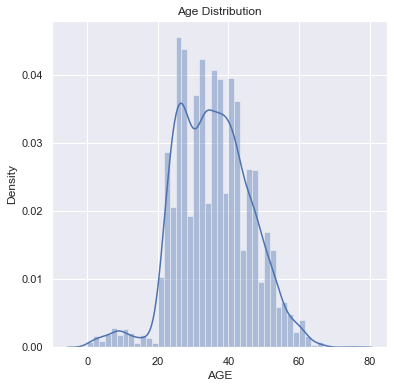

In [469]:

# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df1['AGE'])
plt.title('Age Distribution')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


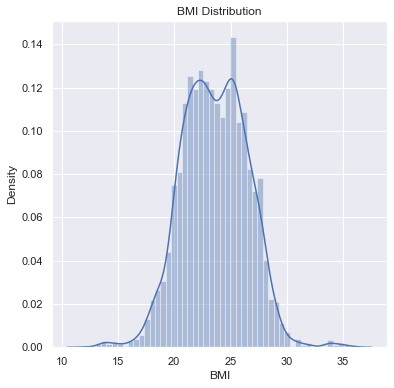

In [470]:
# BMI
plt.figure(figsize=(6,6))
sns.distplot(df1['BMI'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range ----> 18.5 to 24.9

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


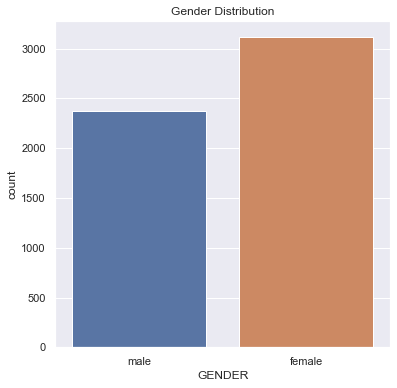

In [471]:
# GENDER
plt.figure(figsize=(6,6))
sns.countplot(df1['GENDER'])
plt.title('Gender Distribution')
plt.show()

In [472]:
df1['GENDER'].value_counts()

female    3119
male      2371
Name: GENDER, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


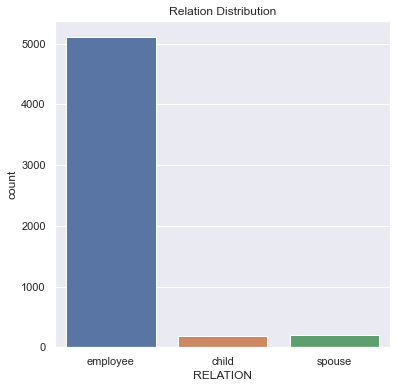

In [473]:
#RELATION
plt.figure(figsize=(6,6))
sns.countplot(df1['RELATION'])
plt.title('Relation Distribution')
plt.show()

In [474]:
df1['RELATION'].value_counts()

employee    5116
spouse       195
child        179
Name: RELATION, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


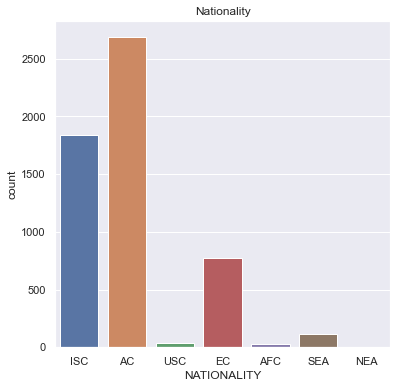

In [475]:
#NATIONALITY

plt.figure(figsize=(6,6))
sns.countplot(df1['NATIONALITY'])
plt.title('Nationality')
plt.show()

In [476]:
df1['NATIONALITY'].value_counts()

AC     2691
ISC    1836
EC      773
SEA     116
USC      39
AFC      31
NEA       4
Name: NATIONALITY, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


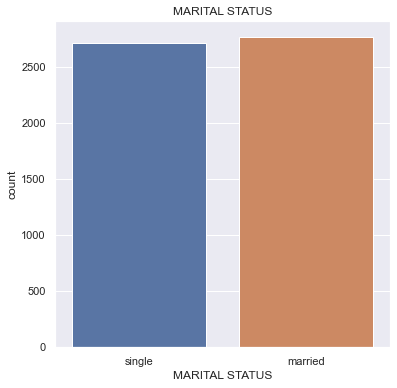

In [477]:
#MARITAL STATUS
plt.figure(figsize=(6,6))
sns.countplot(df1['MARITAL STATUS'])
plt.title('MARITAL STATUS')
plt.show()

In [478]:
df1['MARITAL STATUS'].value_counts()

married    2773
single     2717
Name: MARITAL STATUS, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


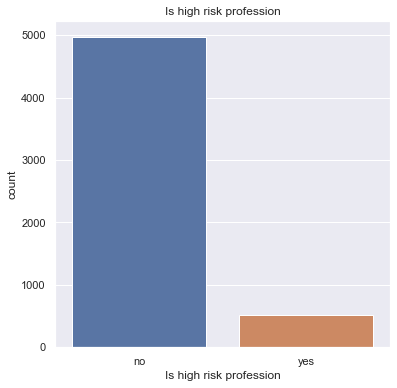

In [479]:
#Is high risk profession
plt.figure(figsize=(6,6))
sns.countplot(df1['Is high risk profession'])
plt.title('Is high risk profession')
plt.show()

In [480]:

df1['MARITAL STATUS'].value_counts()

married    2773
single     2717
Name: MARITAL STATUS, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


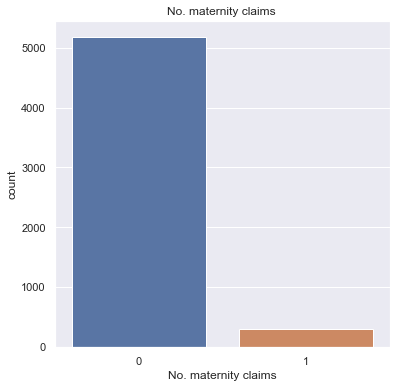

In [481]:
#No. maternity claims 
plt.figure(figsize=(6,6))
sns.countplot(df1['No. maternity claims'])
plt.title('No. maternity claims ')
plt.show()

In [482]:
df1['No. maternity claims'].value_counts()

0    5183
1     307
Name: No. maternity claims, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


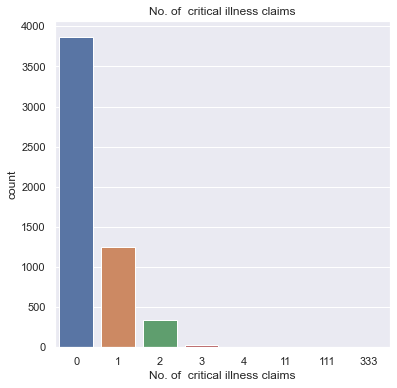

In [483]:
#No. of  critical illness claims
plt.figure(figsize=(6,6))
sns.countplot(df1['No. of  critical illness claims'])
plt.title('No. of  critical illness claims')
plt.show()

In [484]:
df1['No. of  critical illness claims'].value_counts()

0      3871
1      1249
2       339
3        25
4         3
111       1
333       1
11        1
Name: No. of  critical illness claims, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


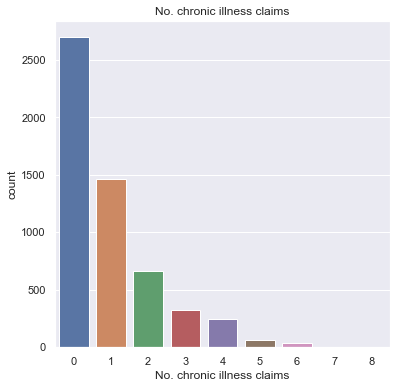

In [485]:
#No. chronic illness claims
plt.figure(figsize=(6,6))
sns.countplot(df1['No. chronic illness claims'])
plt.title('No. chronic illness claims')
plt.show()

In [486]:
df1['No. chronic illness claims'].value_counts()

0    2703
1    1463
2     661
3     322
4     243
5      60
6      36
8       1
7       1
Name: No. chronic illness claims, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


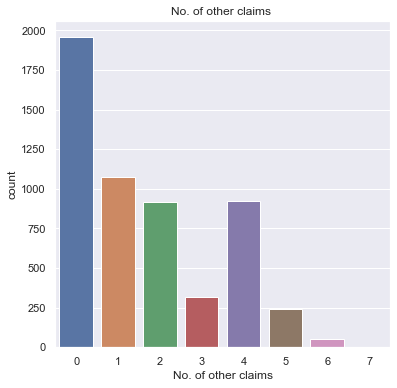

In [487]:
#No. of other claims 
plt.figure(figsize=(6,6))
sns.countplot(df1['No. of other claims'])
plt.title('No. of other claims ')
plt.show()

In [488]:
df1['No. of other claims'].value_counts()

0    1961
1    1078
4     921
2     915
3     315
5     240
6      55
7       5
Name: No. of other claims, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


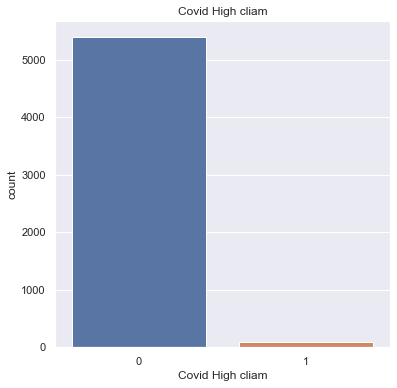

In [489]:
# Covid High cliam
plt.figure(figsize=(6,6))
sns.countplot(df1['Covid High cliam'])
plt.title('Covid High cliam')
plt.show()

In [490]:
df1['Covid High cliam'].value_counts()

0    5397
1      93
Name: Covid High cliam, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


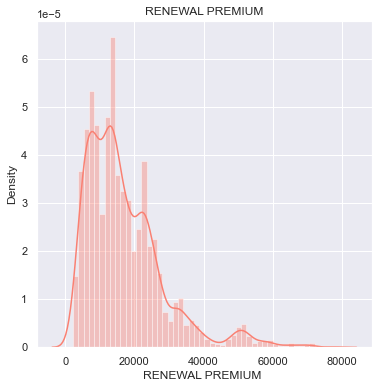

In [491]:
# Renewal Premium
plt.figure(figsize=(6,6))
sns.distplot(df1['RENEWAL PREMIUM '],color="salmon")
plt.title('RENEWAL PREMIUM')
plt.show()

In [492]:
#Detect and Remove the Outliers

<AxesSubplot:xlabel='AGE'>

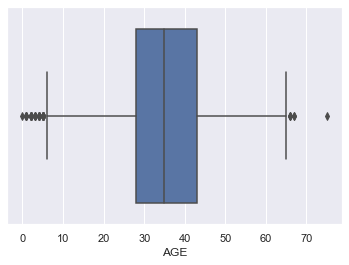

In [493]:
sns.boxplot(x=df1['AGE'])

In [494]:
upper_limit = df1['AGE'].quantile(0.99)
lower_limit = df1['AGE'].quantile(0.01)
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 60.0
lower_limit 7.0


In [495]:
df1= df1[(df1['AGE'] <=60) & (df1['AGE'] >= 7)]

In [496]:
df1.shape

(5398, 13)

<AxesSubplot:xlabel='No. maternity claims'>

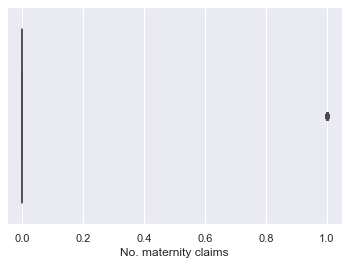

In [497]:
sns.boxplot(x=df1['No. maternity claims'])

<AxesSubplot:xlabel='BMI'>

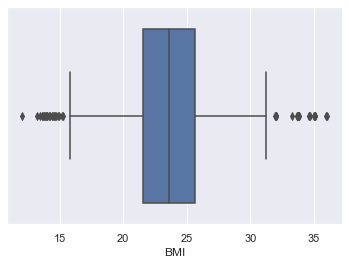

In [498]:
sns.boxplot(x=df1['BMI'])

In [499]:
upper_limit = df1['BMI'].quantile(0.99)
lower_limit = df1['BMI'].quantile(0.01)
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 29.33333333
lower_limit 17.37445287


In [500]:
df1= df1[(df1['BMI'] <= 29.33333333) & (df1['BMI'] >= 17.37445287)]

In [501]:
df1.shape

(5294, 13)

<AxesSubplot:xlabel='No. of  critical illness claims'>

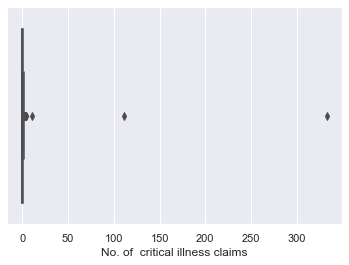

In [502]:
sns.boxplot(x=df1['No. of  critical illness claims'])

In [503]:
upper_limit = df1['No. of  critical illness claims'].quantile(0.99)
lower_limit = df1['No. of  critical illness claims'].quantile(0.01)
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 2.0
lower_limit 0.0


In [504]:
df1= df1[(df1['No. of  critical illness claims'] <= 2) & (df1['No. of  critical illness claims'] >=0)]

In [505]:
df1.shape

(5264, 13)

<AxesSubplot:xlabel='No. chronic illness claims'>

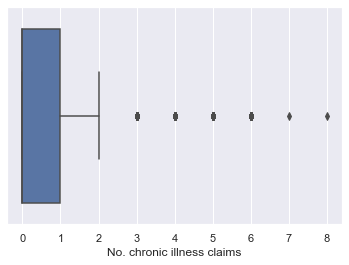

In [506]:
sns.boxplot(x=df1['No. chronic illness claims'])

In [507]:
upper_limit = df1['No. chronic illness claims'].quantile(0.99)
lower_limit = df1['No. chronic illness claims'].quantile(0.01)
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 5.0
lower_limit 0.0


In [508]:
df1= df1[(df1['No. chronic illness claims'] <= 5) & (df1['No. chronic illness claims'] >=0)]

In [509]:
df1.shape

(5228, 13)

<AxesSubplot:xlabel='No. of other claims'>

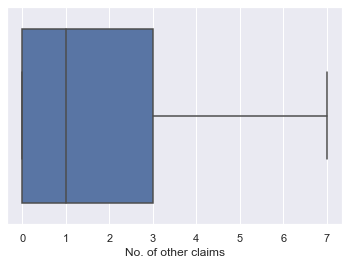

In [510]:
#No. of other claims              
sns.boxplot(x=df1['No. of other claims'])

In [511]:
upper_limit = df1['No. of other claims'].quantile(0.99)
lower_limit = df1['No. of other claims'].quantile(0.01)
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 5.0
lower_limit 0.0


In [512]:
df1= df1[(df1['No. of other claims'] <= 5) & (df1['No. of other claims'] >=0)]

In [513]:
df1.shape

(5176, 13)

<AxesSubplot:xlabel='Covid High cliam'>

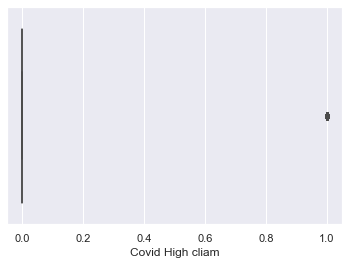

In [514]:
sns.boxplot(x=df1['Covid High cliam'])

<AxesSubplot:xlabel='RENEWAL PREMIUM '>

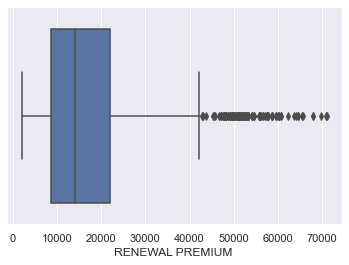

In [515]:
sns.boxplot(x=df1['RENEWAL PREMIUM '])

In [516]:
upper_limit = df1['RENEWAL PREMIUM '].quantile(0.99)
lower_limit = df1['RENEWAL PREMIUM '].quantile(0.01)
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 54053.2
lower_limit 3255.0


In [517]:
df1= df1[(df1['RENEWAL PREMIUM '] <= 54053.2) & (df1['RENEWAL PREMIUM '] >=3255.0)]

In [518]:
df1.shape

(5086, 13)

In [519]:
corrMatrix = df1.corr()
print (corrMatrix)

                                      AGE       BMI  No. maternity claims  \
AGE                              1.000000  0.049589             -0.041221   
BMI                              0.049589  1.000000              0.024465   
No. maternity claims            -0.041221  0.024465              1.000000   
No. of  critical illness claims  0.049409 -0.027237              0.085958   
No. chronic illness claims       0.352894  0.032674              0.038205   
No. of other claims              0.157093  0.018809             -0.123792   
Covid High cliam                 0.055072 -0.023150              0.000179   
RENEWAL PREMIUM                  0.608024  0.020690              0.131036   

                                 No. of  critical illness claims  \
AGE                                                     0.049409   
BMI                                                    -0.027237   
No. maternity claims                                    0.085958   
No. of  critical illness claims   

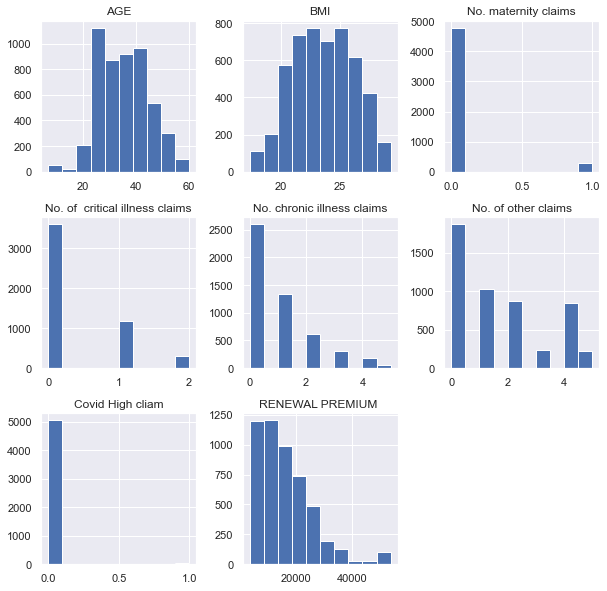

In [520]:
df1.hist(bins=10,figsize=(10,10))
plt.show()

In [523]:
# column rename

df1.rename(columns = {'AGE':'Age','GENDER':'Gender','RELATION':'Relation','NATIONALITY':'Nationality','MARITAL STATUS':'Marital_Status','Is high risk profession':'Is_High_Risk_Prof','No. maternity claims':'No_Mat_Claims','No. of  critical illness claims':'No_Crit_Claims','No. chronic illness claims':'No_Chro_Claims','No. of other claims':'No_Oth_Claims','Covid High cliam':'Covid_H_Claims','RENEWAL PREMIUM ':'Premium'}, inplace = True)

In [524]:
print("\nAfter modifying first column:\n", df1.columns)


After modifying first column:
 Index(['Age', 'BMI', 'Gender', 'Relation', 'Nationality', 'Marital_Status',
       'Is_High_Risk_Prof', 'No_Mat_Claims', 'No_Crit_Claims',
       'No_Chro_Claims', 'No_Oth_Claims', 'Covid_H_Claims', 'Premium'],
      dtype='object')


In [525]:
#Scatter Plot
#independent variables and dependendent variable

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Premium'>

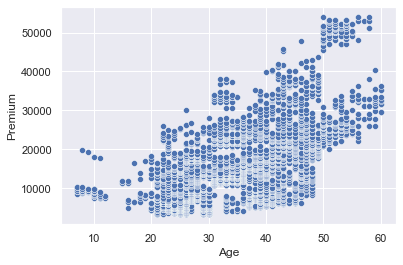

In [526]:
sns.scatterplot(df1["Age"], df1["Premium"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI', ylabel='Premium'>

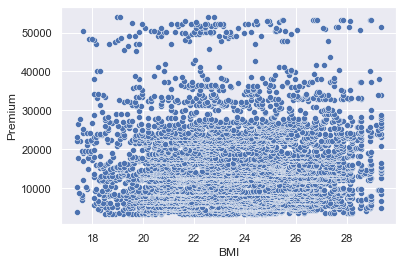

In [527]:
sns.scatterplot(df1["BMI"], df1["Premium"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Premium'>

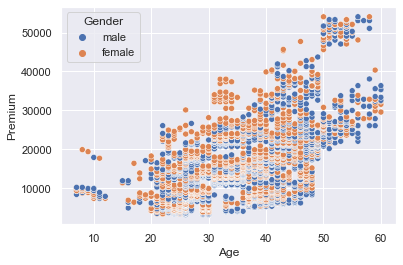

In [528]:
sns.scatterplot(df1["Age"], df1["Premium"],hue=df1["Gender"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Premium'>

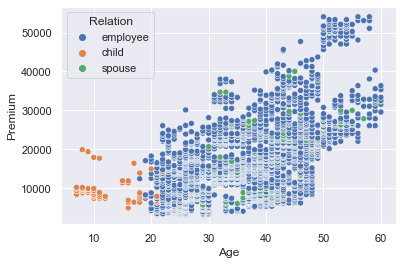

In [529]:
sns.scatterplot(df1["Age"], df1["Premium"],hue=df1["Relation"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Premium'>

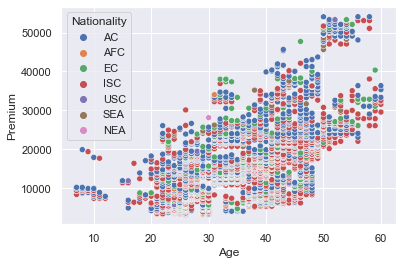

In [530]:
sns.scatterplot(df1["Age"], df1["Premium"],hue=df1["Nationality"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Premium'>

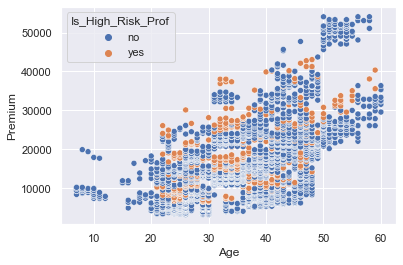

In [531]:
sns.scatterplot(df1["Age"], df1["Premium"],hue=df1["Is_High_Risk_Prof"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Premium'>

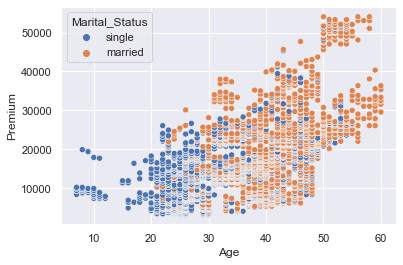

In [532]:
sns.scatterplot(df1["Age"], df1["Premium"],hue=df1["Marital_Status"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Premium'>

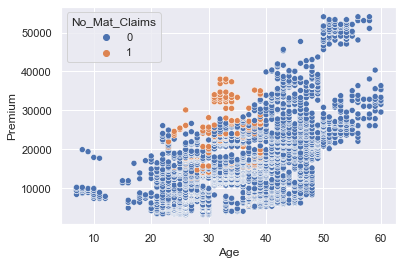

In [533]:
sns.scatterplot(df1["Age"], df1["Premium"],hue=df1["No_Mat_Claims"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Premium'>

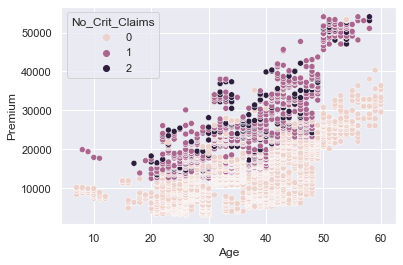

In [534]:
sns.scatterplot(df1["Age"], df1["Premium"],hue=df1["No_Crit_Claims"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Premium'>

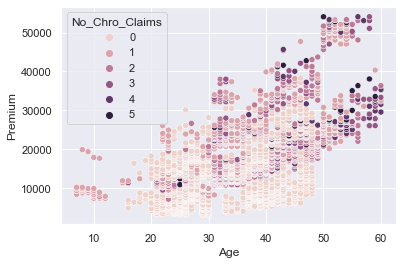

In [535]:
sns.scatterplot(df1["Age"], df1["Premium"],hue=df1["No_Chro_Claims"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Premium'>

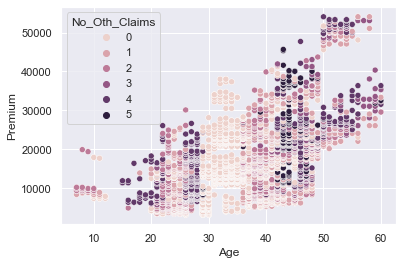

In [536]:
sns.scatterplot(df1["Age"], df1["Premium"],hue=df1["No_Oth_Claims"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Premium'>

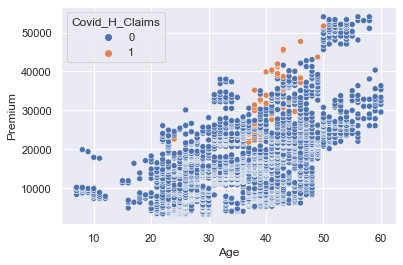

In [537]:
sns.scatterplot(df1["Age"], df1["Premium"],hue=df1["Covid_H_Claims"])

In [538]:
df1.head()

,Age,BMI,Gender,Relation,Nationality,Marital_Status,Is_High_Risk_Prof,No_Mat_Claims,No_Crit_Claims,No_Chro_Claims,No_Oth_Claims,Covid_H_Claims,Premium
41,26,20.324438,male,employee,AC,single,no,0,0,0,0,0,3255.0
42,26,20.449137,male,employee,AC,single,no,0,0,0,0,0,3255.0
43,26,20.446742,male,employee,AC,single,no,0,0,0,0,0,3255.0
44,29,21.778435,male,employee,AC,single,no,0,0,0,0,0,3255.0
45,29,24.653031,male,employee,AC,single,no,0,0,0,0,0,3255.0


In [539]:
#scatter plot between depedendent variable to check multicolinearity 

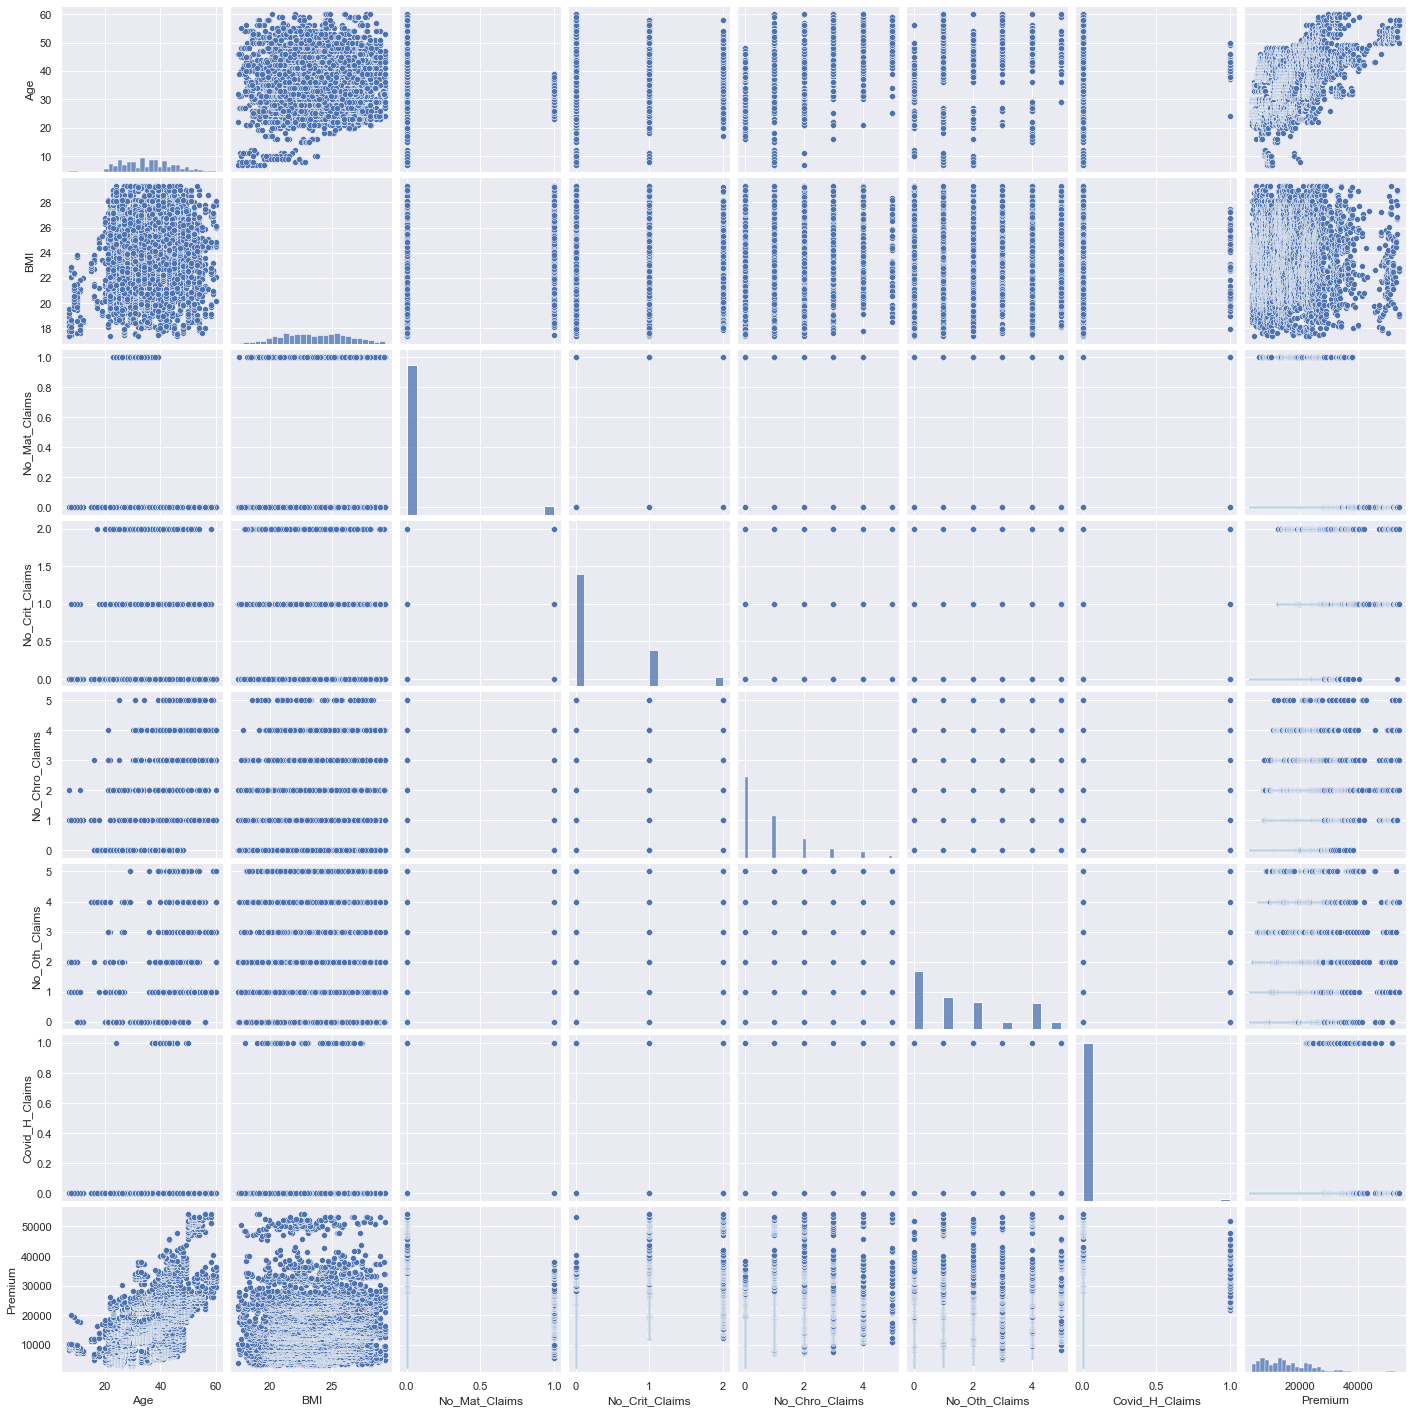

In [540]:
#pair plot
sns.pairplot(df1)

In [541]:
df1.columns

Index(['Age', 'BMI', 'Gender', 'Relation', 'Nationality', 'Marital_Status',
       'Is_High_Risk_Prof', 'No_Mat_Claims', 'No_Crit_Claims',
       'No_Chro_Claims', 'No_Oth_Claims', 'Covid_H_Claims', 'Premium'],
      dtype='object')

In [542]:
df1['Is_High_Risk_Prof'].unique()

array(['no', 'yes'], dtype=object)

ENCODING
One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.

This is required to do since the machine learning algorithms only work on the numerical data. That is why there is a need to convert the categorical column into a numerical one.

get_dummies is the method that creates a dummy variable for each categorical variable.

In [543]:
dummies=pd.get_dummies(df1[['Gender', 'Relation', 'Nationality', 'Marital_Status','Is_High_Risk_Prof']],
                    columns=['Gender', 'Relation', 'Nationality', 'Marital_Status','Is_High_Risk_Prof'],
                      prefix=['Gender', 'Relation', 'Nationality', 'Marital_Status','Is_High_Risk_Prof'],drop_first=True)

In [544]:
dummies

,Gender_male,Relation_employee,Relation_spouse,Nationality_AFC,Nationality_EC,Nationality_ISC,Nationality_NEA,Nationality_SEA,Nationality_USC,Marital_Status_single,Is_High_Risk_Prof_yes
41,1,1,0,0,0,0,0,0,0,1,0
42,1,1,0,0,0,0,0,0,0,1,0
43,1,1,0,0,0,0,0,0,0,1,0
44,1,1,0,0,0,0,0,0,0,1,0
45,1,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5435,0,1,0,0,1,0,0,0,0,0,0
5436,0,1,0,0,0,0,0,0,0,0,0
5437,1,1,0,0,0,0,0,0,0,0,0
5438,1,1,0,0,0,0,0,0,0,0,0


In [545]:
columns=['Gender', 'Relation', 'Nationality', 'Marital_Status','Is_High_Risk_Prof']
df1= pd.concat([df1,dummies],axis=1)
#drop orginal coulmns
df1.drop(columns,axis=1,inplace=True)

In [546]:
df1.head()

,Age,BMI,No_Mat_Claims,No_Crit_Claims,No_Chro_Claims,No_Oth_Claims,Covid_H_Claims,Premium,Gender_male,Relation_employee,Relation_spouse,Nationality_AFC,Nationality_EC,Nationality_ISC,Nationality_NEA,Nationality_SEA,Nationality_USC,Marital_Status_single,Is_High_Risk_Prof_yes
41,26,20.324438,0,0,0,0,0,3255.0,1,1,0,0,0,0,0,0,0,1,0
42,26,20.449137,0,0,0,0,0,3255.0,1,1,0,0,0,0,0,0,0,1,0
43,26,20.446742,0,0,0,0,0,3255.0,1,1,0,0,0,0,0,0,0,1,0
44,29,21.778435,0,0,0,0,0,3255.0,1,1,0,0,0,0,0,0,0,1,0
45,29,24.653031,0,0,0,0,0,3255.0,1,1,0,0,0,0,0,0,0,1,0


In [547]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5086 entries, 41 to 5439
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    5086 non-null   int64  
 1   BMI                    5086 non-null   float64
 2   No_Mat_Claims          5086 non-null   int64  
 3   No_Crit_Claims         5086 non-null   int64  
 4   No_Chro_Claims         5086 non-null   int64  
 5   No_Oth_Claims          5086 non-null   int64  
 6   Covid_H_Claims         5086 non-null   int64  
 7   Premium                5086 non-null   float64
 8   Gender_male            5086 non-null   uint8  
 9   Relation_employee      5086 non-null   uint8  
 10  Relation_spouse        5086 non-null   uint8  
 11  Nationality_AFC        5086 non-null   uint8  
 12  Nationality_EC         5086 non-null   uint8  
 13  Nationality_ISC        5086 non-null   uint8  
 14  Nationality_NEA        5086 non-null   uint8  
 15  Nat

In [548]:
# Train/Test split

1. Split the data into two sets, one training set and ane testing set
2. Train the models on training set
3. Test the models on testing set

In [549]:
from sklearn.model_selection import train_test_split

In [550]:
#Store feature matrix in X and response (target) in Y
df1.columns

Index(['Age', 'BMI', 'No_Mat_Claims', 'No_Crit_Claims', 'No_Chro_Claims',
       'No_Oth_Claims', 'Covid_H_Claims', 'Premium', 'Gender_male',
       'Relation_employee', 'Relation_spouse', 'Nationality_AFC',
       'Nationality_EC', 'Nationality_ISC', 'Nationality_NEA',
       'Nationality_SEA', 'Nationality_USC', 'Marital_Status_single',
       'Is_High_Risk_Prof_yes'],
      dtype='object')

In [551]:
X= df1.drop(['Premium'], axis=1)

In [552]:
X

,Age,BMI,No_Mat_Claims,No_Crit_Claims,No_Chro_Claims,No_Oth_Claims,Covid_H_Claims,Gender_male,Relation_employee,Relation_spouse,Nationality_AFC,Nationality_EC,Nationality_ISC,Nationality_NEA,Nationality_SEA,Nationality_USC,Marital_Status_single,Is_High_Risk_Prof_yes
41,26,20.324438,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
42,26,20.449137,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
43,26,20.446742,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
44,29,21.778435,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
45,29,24.653031,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,54,26.835180,0,0,2,4,0,0,1,0,0,1,0,0,0,0,0,0
5436,50,22.546576,0,1,5,4,0,0,1,0,0,0,0,0,0,0,0,0
5437,56,18.961927,0,1,2,1,0,1,1,0,0,0,0,0,0,0,0,0
5438,56,19.100092,0,1,4,1,0,1,1,0,0,0,0,0,0,0,0,0


In [553]:
y=df1['Premium']

In [554]:
y

41       3255.00
42       3255.00
43       3255.00
44       3255.00
45       3255.00
          ...   
5435    53304.45
5436    54042.50
5437    54053.20
5438    54053.20
5439    54053.20
Name: Premium, Length: 5086, dtype: float64

In [555]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

#here we are dividing the data into 70% training data and 30% testsing data.

# we are training our models with X_train and y_train and testing our models with X_test and Y_test


In [556]:
y_train

74       3385.20
3709    19273.00
1207     8057.70
3861    20918.80
5235    38095.85
          ...   
1248     8196.45
3636    18891.10
1424     8906.25
4890    29086.65
1368     8841.25
Name: Premium, Length: 3560, dtype: float64

In [557]:
# import model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


Model training 

In [558]:
lr= LinearRegression()
lr.fit(X_train,y_train)
svm= SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(X_train,y_train)

  

GradientBoostingRegressor()

Prediction on Test Data

In [559]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)


In [560]:
df2 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [561]:
df2

,Actual,Lr,svm,rf,gr
375,4906.25,6342.600872,13945.824499,4896.4375,4858.008388
651,6186.25,11333.531774,14126.038694,6396.0615,7133.043658
2219,12513.75,11915.977835,13922.704634,12365.0610,11941.995011
762,6433.70,11890.609878,14129.183572,6850.3770,7164.225847
3040,15372.05,12649.014326,14040.823681,15366.8210,14225.820470
...,...,...,...,...,...
2019,11854.35,12525.210762,14039.306171,11309.8660,11558.332975
4487,24207.50,23795.496452,14215.075546,25880.8875,25675.446682
1098,7645.60,7795.371177,13896.840213,7463.8580,7854.436718
1229,8154.90,12809.933065,14129.649783,8118.3190,8691.050400


Compare models visually

In [562]:
import matplotlib.pyplot as plt

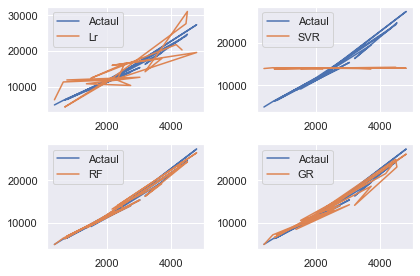

In [563]:
plt.subplot(221)
plt.plot(df2['Actual'].iloc[0:21],label='Actaul')
plt.plot(df2['Lr'].iloc[0:21],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df2['Actual'].iloc[0:21],label='Actaul')
plt.plot(df2['svm'].iloc[0:21],label="SVR")
plt.legend()

plt.subplot(223)
plt.plot(df2['Actual'].iloc[0:21],label='Actaul')
plt.plot(df2['rf'].iloc[0:21],label="RF")
plt.legend()

plt.subplot(224)
plt.plot(df2['Actual'].iloc[0:21],label='Actaul')
plt.plot(df2['gr'].iloc[0:21],label="GR")



plt.tight_layout()

plt.legend()

In [564]:
print("intercept",lr.intercept_)

intercept -640.0673635820294


In [565]:
#co- effcients are
print("coeffients",lr.coef_)

coeffients [  499.20170643    17.72456262  4574.47829317  8851.78014521
  2749.94561375  1073.26359435  7730.79295733  -899.06715775
 -7923.11046948 -9639.6435037   -490.05886526  -613.61944601
 -1841.25898547 -2828.94332089   110.62389621  -192.93903339
  -494.22329313  4075.33254777]


Evaluating the algorithm

In [566]:
from sklearn import metrics

In [567]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)


In [568]:
print(score1,score2,score3,score4)

0.8026276800672325 -0.028997364622339372 0.9867571852210234 0.9833191803507504


In [569]:
# from above values model 3 is performing better than other 3 values


In [570]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)


In [571]:
print(s1,s2,s3,s4)

3121.3836483766013 7351.7568157833575 438.3075976627352 675.5754440785407


In [572]:
from sklearn.metrics import explained_variance_score
e1=explained_variance_score(y_test,y_pred1)
e2=explained_variance_score(y_test,y_pred2)
e3=explained_variance_score(y_test,y_pred3)
e4=explained_variance_score(y_test,y_pred4)

In [573]:
print(e1,e2,e3,e4)

0.8026403037732757 0.01605282935150809 0.9868571633780798 0.983325262995157


In [574]:
import sklearn.metrics as metrics
m1 = metrics.mean_squared_error(y_test,y_pred1)
m2 = metrics.mean_squared_error(y_test,y_pred2)
m3 = metrics.mean_squared_error(y_test,y_pred3)
m4 = metrics.mean_squared_error(y_test,y_pred4)

In [575]:
print(m1,m2,m3,m4)

19453052.700581476 101418172.36366487 1305214.2969552367 1644064.6988203882


In [576]:
from sklearn.metrics import median_absolute_error
md1=median_absolute_error(y_test,y_pred1)
md2=median_absolute_error(y_test,y_pred2)
md3=median_absolute_error(y_test,y_pred3)
md4=median_absolute_error(y_test,y_pred4)

In [577]:
print(md1,md2,md3,md4)

2356.341880003191 6265.186971135903 90.97974999999542 363.8053529313038


In [578]:
# in mean absolute error lowere is better so model 3 is better

In [579]:
#  therefore we rae using random forest regressor for prediction and model deployment

In [580]:
#predict charges for new customer

In [581]:
data={'Age':36,
      'BMI':22,
      'No_Mat_Claims':0,
      'No_Crit_Claims':0,
      'No_Chro_Claims':0,
      'No_Oth_Claims':0,
      'Covid_H_Claims':0,
      'Gender_male':1,
      'Relation_employee':1,
      'Relation_spouse':0,
      'Nationality_AFC':0,
      'Nationality_EC':0,
      'Nationality_ISC':1,
      'Nationality_NEA':0,
      'Nationality_SEA':0,
      'Nationality_USC':0,
      'Marital_Status_single':1,
      'Is_High_Risk_Prof_yes':0}
df4 = pd.DataFrame(data,index=[0])
df4

,Age,BMI,No_Mat_Claims,No_Crit_Claims,No_Chro_Claims,No_Oth_Claims,Covid_H_Claims,Gender_male,Relation_employee,Relation_spouse,Nationality_AFC,Nationality_EC,Nationality_ISC,Nationality_NEA,Nationality_SEA,Nationality_USC,Marital_Status_single,Is_High_Risk_Prof_yes
0,36,22,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0


In [582]:
new_pred = rf.predict(df4)
print(new_pred)

[4754.67]


In [583]:
# Save Model Using Joblib
#its deployment, will train the model with whole data

In [584]:
rf=RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

In [585]:
import joblib

In [586]:
joblib.dump(rf,'model_joblil_rf')

['model_joblil_rf']

In [587]:
model = joblib.load('model_joblil_rf')

In [588]:
model.predict(df4)

array([4662.8925])

In [589]:
# GUI

In [590]:
from tkinter import *

In [591]:
import joblib

In [592]:
def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    p12 = float(e12.get())
    p13 = float(e13.get())
    
    f1=p1
    f2=(p3)/((p2/100)*(p2/100))
    f3=p8
    f4=p9
    f5=p10
    f6=p11
    f7=p12
    f8=p4
    if(p5==1):
        f9=1
        f10=0
    elif(p5==2):
            f10=1
            f9=0
    else:
        f9=0
        f10=0
    if(p6==1):
        f11=1
        f12=0
        f13=0
        f14=0
        f15=0
        f16=0
    elif(p6==2):
        f11=0
        f12=1
        f13=0
        f14=0
        f15=0
        f16=0       
    elif(p6==3):
        f11=0
        f12=0
        f13=1
        f14=0
        f15=0
        f16=0    
    elif(p6==4):
        f11=0
        f12=0
        f13=0
        f14=1
        f15=0
        f16=0 
    elif(p6==5):
        f11=0
        f12=0
        f13=0
        f14=0
        f15=1
        f16=0 
    elif(p6==6):
        f11=0
        f12=0
        f13=0
        f14=0
        f15=0
        f16=1
    else:
        f11=0
        f12=0
        f13=0
        f14=0
        f15=0
        f16=0
        
    f17=p12
    f18=p13
    #print(f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18)
    model=joblib.load('model_joblil_rf')
    result=model.predict([[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18]])
    Label(master, text="Insurance premium").grid(row=15)
    Label(master,text=result).grid(row=16)


master =Tk()
master.title("Insurance Cost Prediction")

label = Label(master,text ="Insurance Cost Prediction", bg ="black",
              fg="white").grid(row=0,columnspan=2)

Label(master,text = "Enter member's age").grid(row=1)
Label(master,text = "Enter member's height").grid(row=2)
Label(master,text = "Enter member's weight").grid(row=3)
Label(master,text = "Enter member's gender [male-1/female-0]").grid(row=4)
Label(master,text = "Enter member's relation [employee-1/spouse-2/child-0]").grid(row=5)
Label(master,text = "Enter member's Nationality[AFC-1/EC-2/ISC-3/NEA-4/SEA-5/USC-6/AUS-0]").grid(row=6)
Label(master,text = "Enter member's marital status[single-1/married-0]").grid(row=7)
Label(master,text = "currently pregnant[yes-1/no-0]").grid(row=8)
Label(master,text = "Any ctrical illness[high-2/low-1/no-0]").grid(row=9)
Label(master,text = "Any chronic illness[high-2/low-1/no-0]").grid(row=10)
Label(master,text = "Any other illness with continuos tretment [yes-1/no-0]").grid(row=11)
Label(master,text = "Any high risk Covid tretment [yes-1/no-0]").grid(row=12)
Label(master,text = "High risk profession [yes-1/no-0]").grid(row=13)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)

Button(master,text="Predict",command=show_entry).grid()

master.mainloop()